In [12]:
# Import Main Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
# Load the Dataset from UCI 
# Titanicdata=pd.read_csv(r'C:\MLData\DataSets\Practice_1\titanic.csv.txt')
Titanicdata=pd.read_csv('https://raw.githubusercontent.com/raju-kpr2/DT_Practice_Project1/master/titanic.csv')
Titanicdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


# Classification Of Survived

In [20]:
# lets check the dataset 
Titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
Titanicdata.shape  # 156 rows ,12 columns 

(156, 12)

In [23]:
# EDA (Exploratory data analysis (EDA) )
Titanicdata.dtypes 
# column R is the type of Object 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
# describe the data set
Titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [25]:
# find out the null values 
Titanicdata.isnull().sum()
# there are  NULL Values in AGE,Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

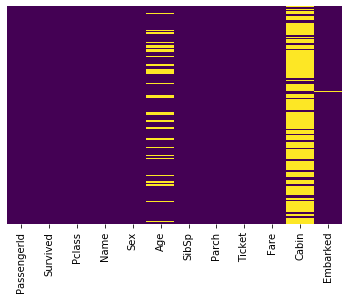

In [28]:
sns.heatmap(Titanicdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# null values are present in Age,cabin 
# Have to Check dependence of the  Age,cabin columns on classification

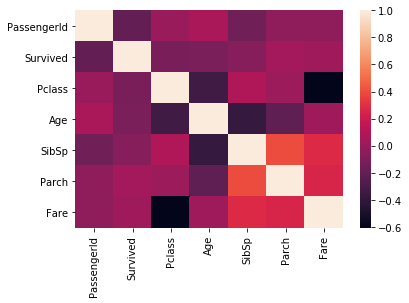

In [36]:
#sns.barplot(x='Pclass', y='Survived', data=Titanicdata)
sns.heatmap(Titanicdata.corr())

In [32]:
Titanicdata["Age"] = Titanicdata["Age"].fillna(value=Titanicdata["Age"].mean())
# find out the null values After Mean Values
Titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

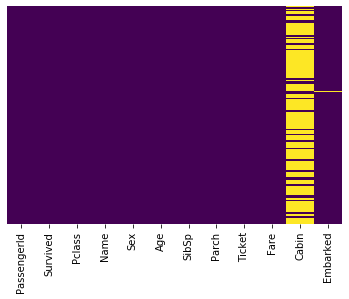

In [33]:
sns.heatmap(Titanicdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# null values are present in Age,cabin 

In [47]:
# Cabin Object data there is no much dependcy so dropping the column 
Titanicdata.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

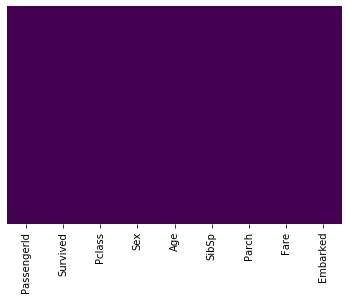

In [48]:
sns.heatmap(Titanicdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# null values are present in Age,cabin 

In [40]:
# dropping NaN Values
Titanicdata.dropna(inplace=True)

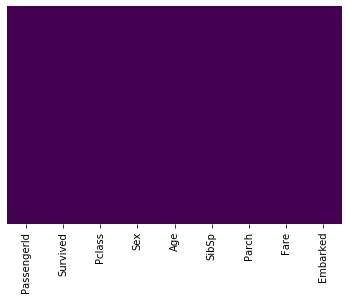

In [49]:
sns.heatmap(Titanicdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [44]:
# Applying Categorical Features
# Label Encoding for Object Column Which is Y
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Titanicdata['Sex'] = labelencoder.fit_transform(Titanicdata['Sex'])
Titanicdata['Embarked'] = labelencoder.fit_transform(Titanicdata['Embarked'])

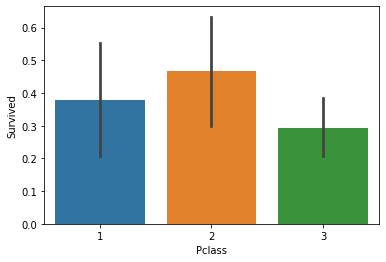

In [50]:
sns.barplot(x='Pclass', y='Survived', data=Titanicdata)

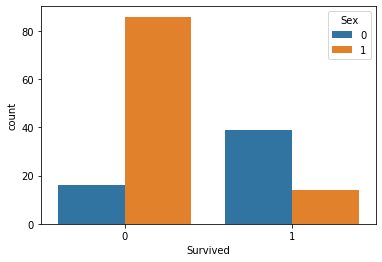

In [61]:
sns.countplot(x='Survived',hue='Sex', data=Titanicdata)

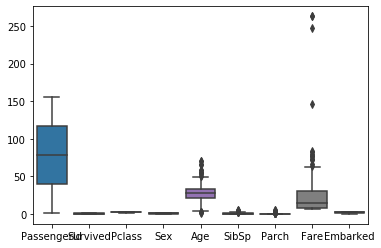

In [62]:
sns.boxplot( data=Titanicdata)

In [64]:
# Lets Check Outliers in the Dataset 
df=pd.DataFrame(data=Titanicdata)
from scipy.stats import zscore
print('Before zscore',Titanicdata.shape)
z_score=abs(zscore(Titanicdata))
data=df.iloc[(z_score<3).all(axis=1)]
print('After zscore',Titanicdata.shape)


Before zscore (155, 9)
After zscore (155, 9)


In [ ]:
# define X,Y  and it's Shape
y=np.array(Titanicdata['Survived'])
y=y.reshape(-1,1)
print(y.shape)
Titanicdata.drop('Survived',axis=1,inplace=True)



In [74]:
x=Titanicdata
x.shape

(155, 8)

In [75]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42

In [99]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
# final_r_state=0
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state            
    #print("max r2 score corresponding to",final_r_state," is ",max_r_score)
            return final_r_state

# Define Classification Models 


In [117]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100)


In [118]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("RandomForestClassifier",RFC))

*********** KNeighborsClassifier ************




random state value = None
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.6451612903225806


Cross_Val_Score= 0.4544362745098039


roc_auc_score= 0.5023809523809525


classification_report
               precision    recall  f1-score   support

           0       0.68      0.90      0.78        21
           1       0.33      0.10      0.15        10

   micro avg       0.65      0.65      0.65        31
   macro avg       0.51      0.50      0.46        31
weighted avg       0.57      0.65      0.57        31



[[19  2]
 [ 9  1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************




random state value = None
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability

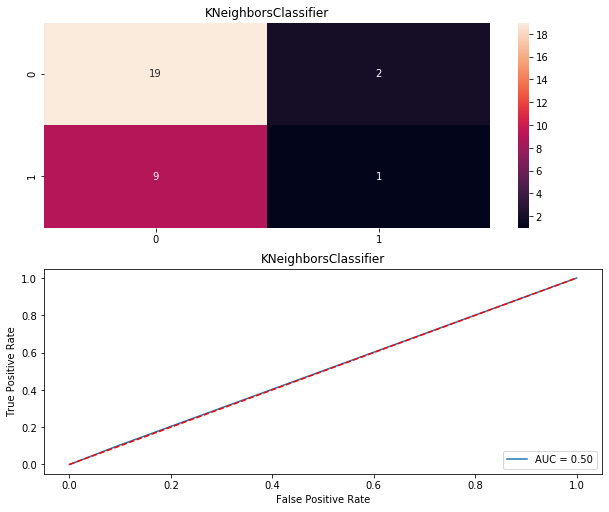

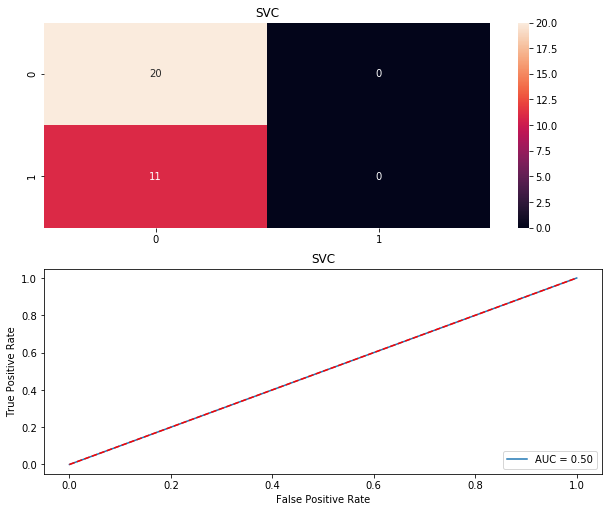

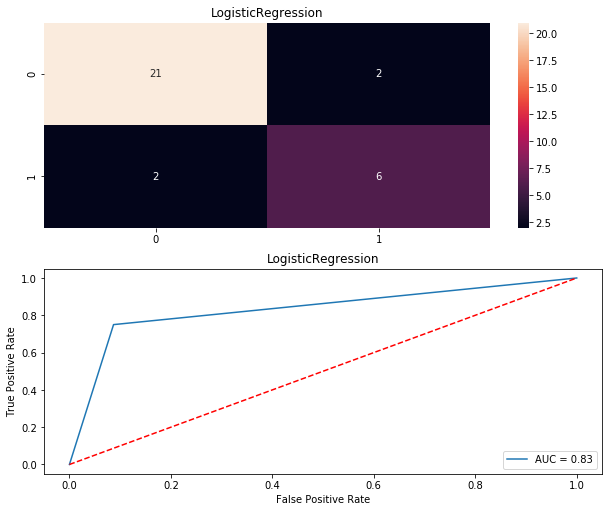

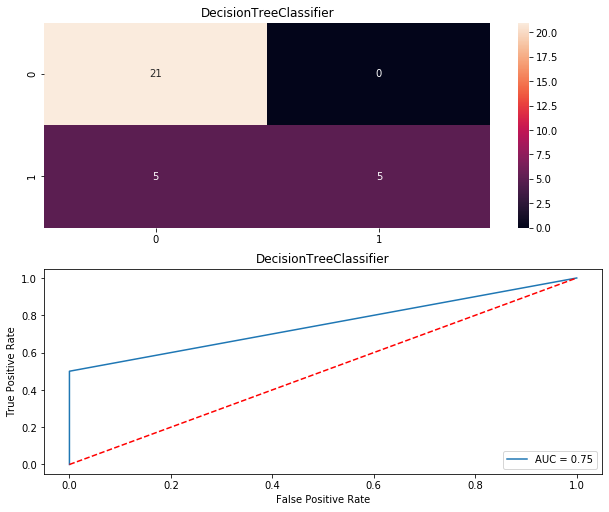

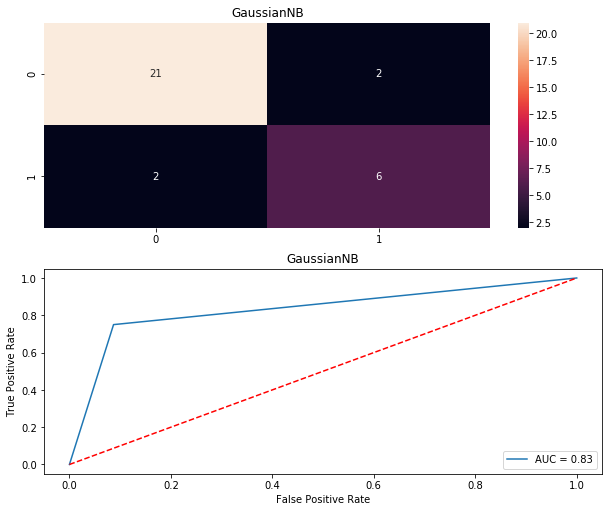

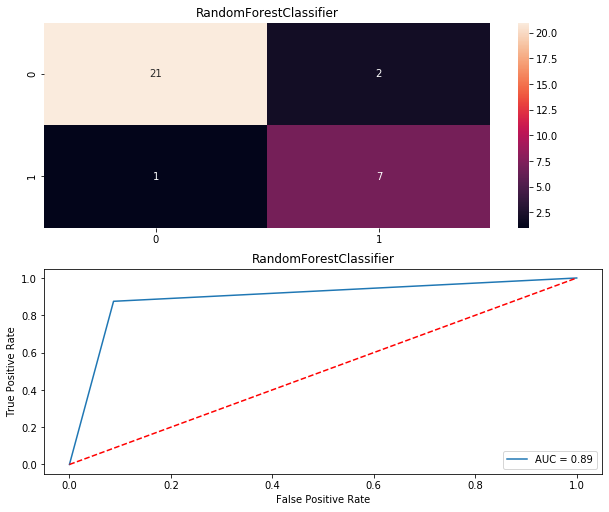

In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [195]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,64.516129,45.443627,50.238095
1,SVC,64.516129,64.602941,50.000000
2,LogisticRegression,87.096774,80.715686,83.152174
3,DecisionTreeClassifier,83.870968,65.615196,75.000000
4,GaussianNB,87.096774,76.482843,83.152174
5,RandomForestClassifier,90.322581,73.144608,89.402174


In [196]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(RFC,'Titanic_RFC_Model')
OuModel=joblib.load('Titanic_RFC_Model')
OuModel.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)